# Laboratorio 1
Universidad del Valle de Guatemala<br>
Cifrado de Información<br>
Pablo Andrés Zamora Vásquez<br>
Carné 21780
<br><br>
<hr>

## Parte 1 - Ingeniería de características

### Exploración de datos

In [1]:
# 1. Cargue el dataset en un dataframe de pandas, muestre un ejemplo de cinco observaciones

import pandas as pd

df = pd.read_csv('dataset_phishing.csv')

print(df.head(5))

                                                 url      status
0              http://www.crestonwood.com/router.php  legitimate
1  http://shadetreetechnology.com/V4/validation/a...    phishing
2  https://support-appleld.com.secureupdate.duila...    phishing
3                                 http://rgipt.ac.in  legitimate
4  http://www.iracing.com/tracks/gateway-motorspo...  legitimate


In [2]:
# 2. Muestre la cantidad de observaciones etiquetadas en la columna status como “legit” y como “phishing”. ¿Está balanceado el dataset?

print(df['status'].value_counts())

status
legitimate    5715
phishing      5715
Name: count, dtype: int64


Sí, el dataset está balanceado. Tiene la misma cantidad de registros legítimos y de phishing.

### Derivación de características

1. ¿Qué ventajas tiene el análisis de una URL contra el análisis de otros datos, cómo el tiempo
de vida del dominio, o las características de la página Web?

El análisis de una URL presenta varias ventajas al compararlo con el análisis de listas negras ("blacklists"), el análisis de contenido, el análisis de vida útil del dominio o el análisis de similaridades entre sitios maliciosos y sitios legítimos. Entre ellas:

- **Detección en tiempo real:** El análisis de URLs permite identificar sitios de phishing desde el momento de su creación, ya que se basa completamente en el análisis estadístico de la URL de un sitio para determinar si es malicioso. Esto lo hace mucho más efectivo contra amenazas de cero horas ("zero-hour threats"); es decir, aquellas amenazas que no se hayan visto antes y, por lo tanto, no son conocidas por una firma de malware 

- **Independencia de terceros:** Como se mencionó antes, el análisis de URLs es independiente; es decir, no depende de bases de datos externas, como listas negras o servicios de reputación de domino para determinar si un sitio es malicioso o no, lo que lo hace más rápido y autónomo.

- **Menor consumo de recursos:** Dado que este análisis se basa únicamente en las URLs de sitios, no necesita realizar consultas externas, por ejemplo, para obtener el contenido de la página. Esto reduce considerablemente el tiempo de procesamiento.

- **A prueba de técnicas de evasión:** Los responsables de un sitio malicioso pueden modificar fácilmente su contenido para evadir la detección basada en características sospechosas de una página web, pero es más laborioso cambiar los patrones de las URLs sin afectar su funcionalidad.

- **Indiferente del lenguaje:** La efectividad de este análisis no se ve afectada por el idioma del contenido del sitio, ya que únicamente trabaja con la estructura de la URL.

(URL-based Phishing Detection using the Entropy of NonAlphanumeric Characters)<br>
(Machine learning based phishing detection from URLs)
<hr>

2. ¿Qué características de una URL son más prometedoras para la detección de phishing?

Algunas características que podrían ser de utilidad en el análisis y clasificación de URLs son:

- **Longitud de la URL:** Las URLs maliciosas tienden a ser más largas que las URLs legítimas, esto podría deberse a que diferentes DGAs utilizan nombres de dominios legítimos para incluir en la URL generada. Por ejemplo googlexyz.com.

- **Cantidad de caracteres especiales:** Caracteres especiales como "@", "_", "?" suelen presentarse con más frecuencia en URLs maliciosas.

- **Cantidad de subdominios presentes en la URL:** Una cantidad elevada de subdominios presentes en la URL puede ser un indicador de phishing. Por ejemplo: login.bank.website.xyz.com.

- **Uso de direcciones IP en lugar de nombres de dominio:** Las URLs maliciosas a menudo utilizan una IP pública en lugar de un nombre de dominio legible.

- **Número de redirecciones:** Las URLs que indican redirecciones a otros sitios suelen ser sospechosas.

- **Uso de HTTPS:** Muchas direcciones de phishing utilizan encriptado HTTPS para dar confianza al usuario, a pesar de que esto no implica que el uso que haga el sitio de su información se legítimo.

- **Cantidad de directorios en la ruta:** Un número alto de directorios en la URL puede ser un indicador de phishing.

- **Uso de acortadores:** El uso de servicios como *bit.ly* o *tinyurl.com* pueden utilizarse para ocultar la verdadera dirección del sitio.

- **Cantidad de caracteres repetidos:** Una gran cantidad de caracteres repetidos en la URL puede ser sospechoso.

- **Uso de símbolos engañosos:** Caracteres como "@" en una URL pueden indicar intentos de suplantación de identidad o *spoofing*.

- **Cantidad de parámetros en la URL:** Una cantidad excesiva de parámetros en la cadena de consulta puede ser una señal de phishing.

- **Frecuencia de caracteres no-alfanuméricos:** La distribución de caracteres no alfanuméricos puede ser un indicador distintivo entre URLs legítimas y maliciosas.

- **Entropía de Shannon:** La entropía mide el nivel de desorden en la URL, y las URLs de phishing suelen tener una entropía mayor.

- **Entropía relativa:** Permite comparar la entropía de una URL con la entropía promedio de URLs legítimas y maliciosas para mejorar la detección.

(URL-based Phishing Detection using the Entropy of NonAlphanumeric Characters)<br>
(Machine learning based phishing detection from URLs)
<hr>

In [3]:
import re
import math
import urllib.parse
from collections import Counter

def url_length(url):
    return len(url)

def count_special_chars(url):
    return sum(1 for c in url if not c.isalnum())

def count_subdomains(url):
    return url.count('.')

def has_ip_address(url):
    return bool(re.search(r'\d+\.\d+\.\d+\.\d+', url))

def count_redirects(url):
    return url.count('//') - 1

def has_https(url):
    return url.startswith("https://")

def contains_suspicious_words(url):
    suspicious_keywords = ["secure", "account", "login", "verify", "bank", "update"]
    return any(word in url.lower() for word in suspicious_keywords)

def count_directories(url):
    return url.count('/')

def uses_shortener(url):
    shorteners = ["bit.ly", "tinyurl", "goo.gl"]
    return any(shortener in url for shortener in shorteners)

def count_repeated_chars(url):
    return sum(1 for match in re.finditer(r'(.)\1{2,}', url))

def contains_at_symbol(url):
    return '@' in url

def count_query_params(url):
    parsed_url = urllib.parse.urlparse(url)
    return len(urllib.parse.parse_qs(parsed_url.query))

def shannon_entropy(url):
    prob = [ float(url.count(char)) / len(url) for char in dict.fromkeys(list(url)) ] 
    entropy = - sum([ p * math.log2(p) for p in prob ]) 
    return entropy

def relative_entropy(url):
    entropy = 0.0
    length = len(url) * 1.0

    if length > 0:
        cnt = Counter(url)
            
        probabilities = {
            '-': 0.013342298553905901,
            '_': 9.04562613824129e-06,
            '0': 0.0024875471880163543,
            '1': 0.004884638114650296,
            '2': 0.004373560237839663,
            '3': 0.0021136613076357144,
            '4': 0.001625197496170685,
            '5': 0.0013070929769758662,
            '6': 0.0014880054997406921,
            '7': 0.001471421851820583,
            '8': 0.0012663876593537805,
            '9': 0.0010327089841158806,
            'a': 0.07333590631143488,
            'b': 0.04293204925644953,
            'c': 0.027385633133525503,
            'd': 0.02769469202658208,
            'e': 0.07086192756262588,
            'f': 0.01249653250998034,
            'g': 0.038516276096631406,
            'h': 0.024017645001386995,
            'i': 0.060447396668797414,
            'j': 0.007082725266242929,
            'k': 0.01659570875496002,
            'l': 0.05815885325582237,
            'm': 0.033884915513851865,
            'n': 0.04753175014774523,
            'o': 0.09413783122067709,
            'p': 0.042555148167356144,
            'q': 0.0017231917793349655,
            'r': 0.06460084667060655,
            's': 0.07214640647425614,
            't': 0.06447722311338391,
            'u': 0.034792493336388744,
            'v': 0.011637198026847418,
            'w': 0.013318176884203925,
            'x': 0.003170491961453572,
            'y': 0.016381628936354975,
            'z': 0.004715786426736459
        }
            
        for char, count in cnt.items():
            try:
                observed = count / length
                expected = probabilities.get(char, 0.0001)  # Asigna un valor mínimo en lugar de fallar
                entropy += observed * math.log2(observed / expected)
            except:
                print(url)
        return entropy


### Preprocesamiento

In [4]:
# Realice las modificaciones necesarias para convertir la variable categórica status a una variable binaria.

df_features = df.copy()
df_features['status'] = df['status'].apply(lambda x: 1 if x == 'phishing' else 0)

# Agregar las características adicionales al dataset

def extract_domain(url):
    parsed_url = urllib.parse.urlparse(url)
    return parsed_url.netloc

df_features["domain"] = df["url"].apply(extract_domain)

# Características que usan la URL completa

df_features["url_length"] = df_features["url"].apply(url_length)
df_features["special_char_count"] = df_features["url"].apply(count_special_chars)
df_features["redirect_count"] = df_features["url"].apply(count_redirects)
df_features["has_https"] = df_features["url"].apply(has_https)
df_features["contains_suspicious_words"] = df_features["url"].apply(contains_suspicious_words)
df_features["directory_count"] = df_features["url"].apply(count_directories)
df_features["repeated_char_count"] = df_features["url"].apply(count_repeated_chars)
df_features["contains_at_symbol"] = df_features["url"].apply(contains_at_symbol)
df_features["query_param_count"] = df_features["url"].apply(count_query_params)

# Características que usan el dominio
df_features["subdomain_count"] = df_features["domain"].apply(count_subdomains)
df_features["has_ip"] = df_features["domain"].apply(has_ip_address)
df_features["uses_shortener"] = df_features["domain"].apply(uses_shortener)
df_features["shannon_entropy"] = df_features["domain"].apply(shannon_entropy)
df_features["relative_entropy"] = df_features["domain"].apply(relative_entropy)

print(df_features['status'].value_counts())
print(df_features.head(5))

status
0    5715
1    5715
Name: count, dtype: int64
                                                 url  status  \
0              http://www.crestonwood.com/router.php       0   
1  http://shadetreetechnology.com/V4/validation/a...       1   
2  https://support-appleld.com.secureupdate.duila...       1   
3                                 http://rgipt.ac.in       0   
4  http://www.iracing.com/tracks/gateway-motorspo...       0   

                                              domain  url_length  \
0                                www.crestonwood.com          37   
1                            shadetreetechnology.com          77   
2  support-appleld.com.secureupdate.duilawyeryork...         126   
3                                        rgipt.ac.in          18   
4                                    www.iracing.com          55   

   special_char_count  redirect_count  has_https  contains_suspicious_words  \
0                   7               0      False                      Fals

In [5]:
# Contar la cantidad de valores nulos en cada columna
df.isnull().sum()

url       0
status    0
dtype: int64

### Selección de características

*En la exploración de datos, determine las columnas que son constantes, o que no tienen una varianza
alta con la columna status. Elimine las características repetidas o irrelevantes para la clasificación de
un sitio de phishing. Verifique que no posee observaciones repetidas. Apóyese con la visualización de
características y correlación para seleccionar las características más importantes para clasificar una
URL legítima de una URL de phishing.*

Correlación con la columna status:
status                 1.000000
repeated_char_count    0.294190
url_length             0.248482
directory_count        0.242270
query_param_count      0.230041
shannon_entropy        0.216433
special_char_count     0.199144
relative_entropy       0.131941
subdomain_count        0.102622
redirect_count         0.061499
Name: status, dtype: float64


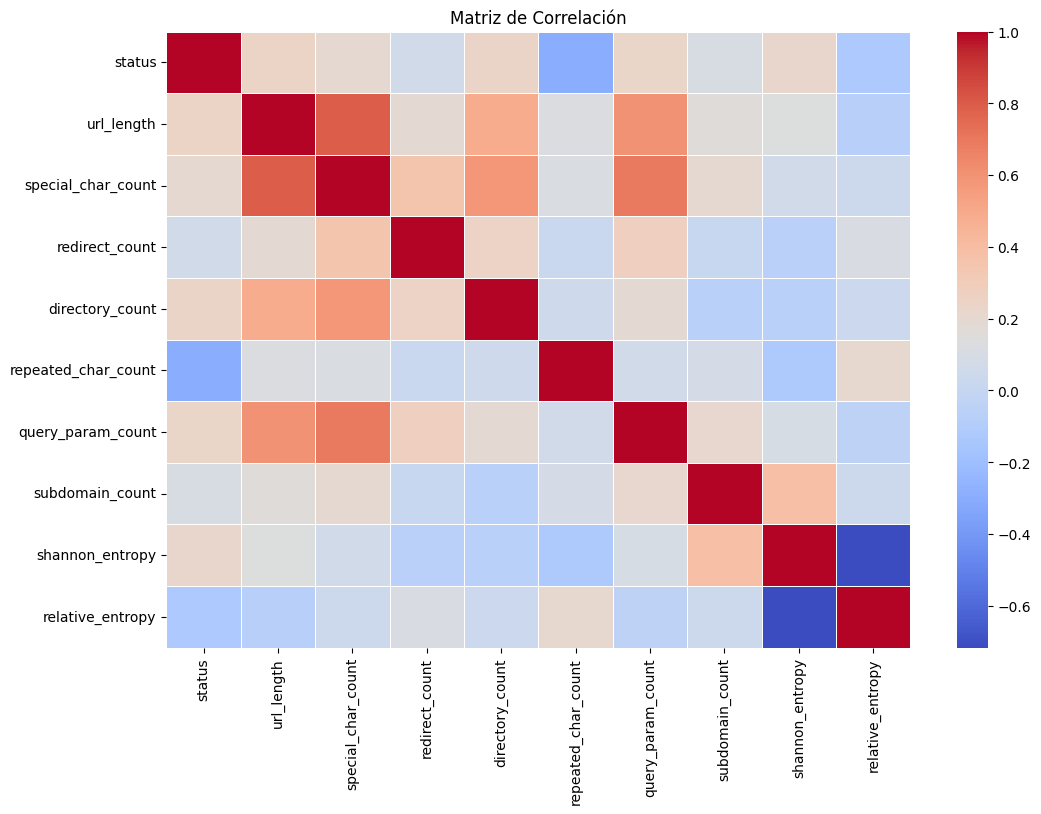

Columnas constantes: []
Características con baja varianza: ['redirect_count']
Características con baja correlación: ['subdomain_count', 'redirect_count']
Cantidad de observaciones duplicadas: 1


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Identificar columnas constantes
constant_columns = [col for col in df_features.columns if df_features[col].nunique() == 1]

# 2. Filtrar solo columnas numéricas
df_numeric = df_features.select_dtypes(include=[np.number])

# 3. Verificar la varianza de las características con la columna status
variances = df_numeric.var().sort_values()

# 4. Verificar la correlación con la columna status
correlation_matrix = df_numeric.corr()
correlation_with_status = correlation_matrix["status"].abs().sort_values(ascending=False)
print('Correlación con la columna status:')
print(correlation_with_status)

# 5. Verificar observaciones duplicadas
duplicates = df_features[df_features.duplicated()]

# 6. Visualización de la correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()

# 7. Encontrar las características con baja correlación a la columna status
selected_features = correlation_with_status[correlation_with_status < 0.11].index.tolist()

# Mostrar los resultados
results = {
    "constant_columns": constant_columns,
    "low_variance_features": variances[variances < 0.05].index.tolist(),
    "low_correlation_features": selected_features,
    "duplicate_observations": duplicates
}

print(f'Columnas constantes: {results["constant_columns"]}')
print(f'Características con baja varianza: {results["low_variance_features"]}')
print(f'Características con baja correlación: {results["low_correlation_features"]}')
print(f'Cantidad de observaciones duplicadas: {df_features.duplicated().sum()}')


In [7]:
# Se eliminan las características con baja varianza y baja correlación con la columna status
df_filtered = df_features.drop(columns=results["constant_columns"] + results["low_variance_features"])

# Eliminar la característica "domain" ya que se usó para extraer otras características
df_filtered = df_filtered.drop(columns=["domain"])

# Eliminar la columna "url" ya que no se utilizará en el modelo
df_filtered = df_filtered.drop(columns=["url"])

# Se eliminan las observaciones duplicadas
df_filtered = df_filtered.drop_duplicates()


df_filtered.columns

Index(['status', 'url_length', 'special_char_count', 'has_https',
       'contains_suspicious_words', 'directory_count', 'repeated_char_count',
       'contains_at_symbol', 'query_param_count', 'subdomain_count', 'has_ip',
       'uses_shortener', 'shannon_entropy', 'relative_entropy'],
      dtype='object')

3. ¿Qué columnas o características fueron seleccionadas y por qué?

Las características que se conservaron presentan una correlación aceptable con respecto a la variable objetivo *status*, así como suficiente variación entre entre URLs legítimas y maliciosas. Por otro lado, se descartaron las características *redirect_count* y *subdomain_count* ya que la primera no varía lo suficiente entre URLs legítimas y de phishing, y ninguna de las dos tiene una correlación lo suficientemente fuerte para afirmar que pueden ser relevantes en la clasificación de URLs.

## Parte 2 - Implementación

### Selección de características

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Separar en características (X) y etiqueta (y)
X = df_filtered.drop(columns=['status'])
y = df_filtered['status']

# División en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.45, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6667, random_state=42, stratify=y_temp)  # 15% validación, 30% prueba

# Guardar los datasets en archivos CSV
pd.concat([X_train, y_train], axis=1).to_csv('train.csv', index=False)
pd.concat([X_val, y_val], axis=1).to_csv('val.csv', index=False)
pd.concat([X_test, y_test], axis=1).to_csv('test.csv', index=False)

### Implementación

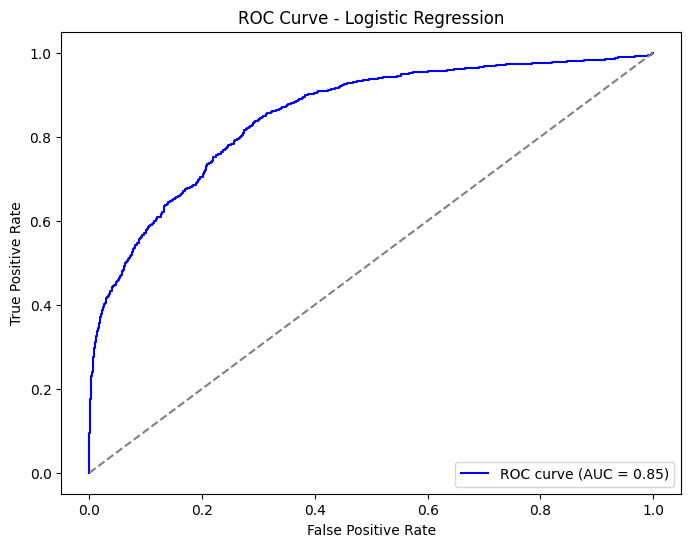

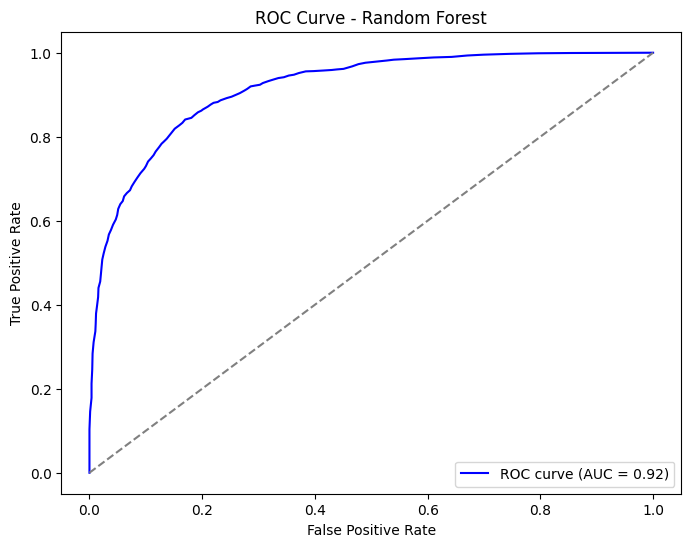

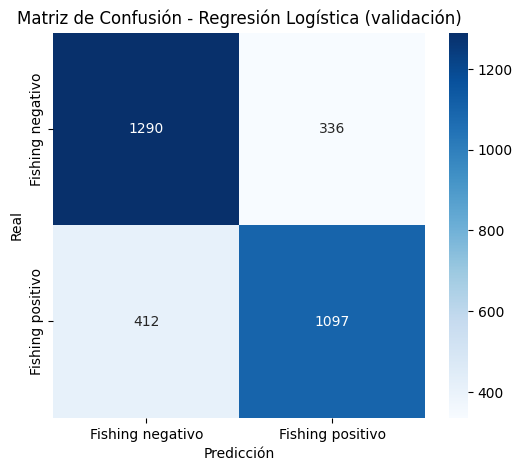

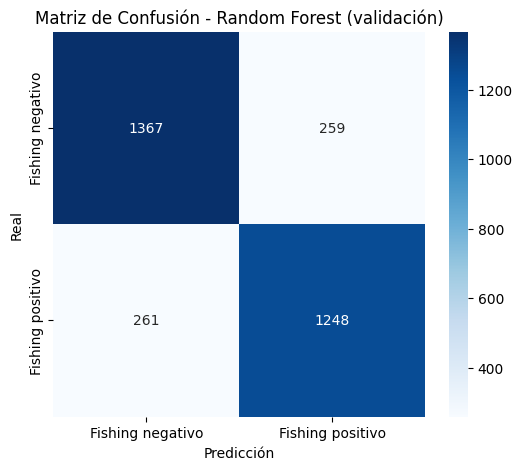

,model,confusion_matrix,precision,recall,f1-score,FPR,FNR
0,Logistic Regression (Validation),"[[627, 185], [206, 548]]",0.747613,0.726790,0.737054,0.227833,0.273210
1,Logistic Regression (Test),"[[1290, 336], [412, 1097]]",0.765527,0.726972,0.745751,0.206642,0.273028
2,Random Forest (Validation),"[[669, 143], [111, 643]]",0.818066,0.852785,0.835065,0.176108,0.147215
3,Random Forest (Test),"[[1367, 259], [261, 1248]]",0.828135,0.827038,0.827586,0.159287,0.172962


In [9]:
# 1. Modelo de Regresión Logística
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predicciones en validación y prueba
y_val_pred_logistic = logistic_model.predict(X_val)
y_test_pred_logistic = logistic_model.predict(X_test)

# 2. Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones en validación y prueba
y_val_pred_rf = rf_model.predict(X_val)
y_test_pred_rf = rf_model.predict(X_test)

# Obtener métricas de evaluación
def evaluate_model(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    TN, FP, FN, TP = cm.ravel()  # Descomponer la matriz de confusión
    return {
        "model": model_name,
        "confusion_matrix": cm,
        "precision": report["1"]["precision"],
        "recall": report["1"]["recall"],
        "f1-score": report["1"]["f1-score"],
        "FPR": FP / (FP + TN),
        "FNR": FN / (FN + TP)
    }

# Evaluación de los modelos en validación y prueba
eval_logistic_val = evaluate_model(y_val, y_val_pred_logistic, "Logistic Regression (Validation)")
eval_logistic_test = evaluate_model(y_test, y_test_pred_logistic, "Logistic Regression (Test)")

eval_rf_val = evaluate_model(y_val, y_val_pred_rf, "Random Forest (Validation)")
eval_rf_test = evaluate_model(y_test, y_test_pred_rf, "Random Forest (Test)")

# Curva ROC y AUC
def plot_roc_curve(y_true, y_pred_probs, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

def plot_confusion_matrix(conf_matrix, title='Matriz de Confusión'):

    if conf_matrix.shape != (2, 2):
        raise ValueError("La matriz de confusión debe ser de tamaño 2x2.")
    
    labels = ['Fishing negativo', 'Fishing positivo']
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()


# Plot de Curva ROC para ambos modelos en los datos de prueba
y_test_probs_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_test_probs_rf = rf_model.predict_proba(X_test)[:, 1]

plot_roc_curve(y_test, y_test_probs_logistic, "Logistic Regression")
plot_roc_curve(y_test, y_test_probs_rf, "Random Forest")

# Plot de Matrices de Confusión
plot_confusion_matrix(eval_logistic_test["confusion_matrix"], "Matriz de Confusión - Regresión Logística (validación)")
plot_confusion_matrix(eval_rf_test["confusion_matrix"], "Matriz de Confusión - Random Forest (validación)")

# Resultados
eval_results = [eval_logistic_val, eval_logistic_test, eval_rf_val, eval_rf_test]
df_results = pd.DataFrame(eval_results)
df_results

## Discusión

<b> 4. ¿Cuál es el impacto de clasificar un sitio legítimo como phishing? </b>

Cuando un sitio legítimo se clasifica como phishing de forma generalizada, puede traer varias consecuencias negativas, principalmente para los dueños del sitio. En primer lugar, los usuarios pueden perder la confianza en el sitio web, afectando negativamente su reputación y dañando la marca. Esto puede repercutir en la disminución del tráfico y en caso de comercio electrónico, una eventual caída de las ventas. En casos más extremos algunos navegadores podrían bloquear por completo el acceso al sitio, dificultando el ingreso incluso para los usuarios que aún mantuviesen la confianza pese a dichos señalamientos.

<b> 5. ¿Cuál es el impacto de clasificar un sitio de phishing como legítimo?</b>

En este caso, el peligro recae sobre los usuarios del sitio, pues estos pueden ser engañados para proporcionar información personal y datos sensibles, lo que puede generar robos de identidad, fraudes financieros, sufrir pérdidas económicas directas, etc. Por otro lado, se pueden adquirir malwares que comprometan la seguiridad de los dispositivos, redes o sistemas. Además, si se corrompió un sitio legítimo, esto podría provocar daños en su reputación.



<b> 6. En base a las respuestas anteriores, ¿Qué métrica elegiría para comparar modelos similares de clasificación de phishing?</b>

Por un lado la métrica "precisión" permite mostrar la proporción de predicciones positivas que son correctas, en donde un valor alto indica que el modelo comete pocos errores para clasificar casos de fishing como positivos cuando en realidad no lo son. Mientras que, "recall" mide la cantidad de casos positivos reales que el modelo logró clasificar como phishing, es decir de todos los casos de phishing, cuántos logró detectar adecuadamente.

Aunque ambas métricas son importantes, si se tiene que seleccionar una sola, se estaría cometiendo un error, pues se podrían seleccionar modelos con sesgo hacia generar falsos positivos o falsos negativos, lo cual tal y como se discutió, puede generar inconvenientes graves en ambos casos de error, tanto para los dueños de sitios legítimos que son clasificados como phishing, como para usuarios vulnerables a ingresar a sitios maliciosos.

Por lo tanto, se recomienda utilizar el F1-score, el cual combina la precisión y el recall en un solo valor, calculando su media armónica. Al emplear esta métrica se proporciona un equilibrio entre precisión y recall, permitiendo evaluar el desempeño del modelo de manera más justa en escenarios donde ambos tipos de error pueden tener consecuencias significativas.



<b> 7. ¿Qué modelo funcionó mejor para la clasificación de phishing? ¿Por qué?</b>

Ambos modelos presentan un funcionamiento bueno, sin embargo el random forest evidenció mejores resultados a través de las métricas calculadas. 

En la curva ROC, muestra que puede identificar correctamente el 92% de los casos, presentando una alta sensibilidad con un bajo nivel de falsos positivos, en comparación con el 85% de los casos identificados correctamente por el modelo de regresión logística.

Por otra parte, el modelo de random forest presenta un f1-score de 0.82 (superior al 0.74 obtenido por la regresión logística), indicando un sólido balance entre precisión y recall, lo cual, tal y como se mencionó anteriormente, significa que el modelo es capaz de identificar correctamente una proporción alta de instancias positivas, mientras mantiene una buena proporción de predicciones positivas correctas. Por lo tanto, se puede establecer que  el modelo mantiene un balance adecuado entre falsos positivos y falsos negativos de páginas de phishing.

Finalmente, al analizar la matriz de confusión de ambos modelos, el modelo de regresión logística muestra 336 falsos positivos y 412 falsos negativos en casos de phishing, mientras que el modelo de Random Forest presenta únicamente 259 falsos positivos y 261 falsos negativos.


<b> 7. Una empresa desea utilizar su mejor modelo, debido a que sus empleados sufren constantes ataques de phishing mediante e-mail. La empresa estima que, de un total de 50,000 emails, un 15% son phishing. ¿Qué cantidad de alarmas generaría su modelo? ¿Cuántas positivas y cuantas negativas? ¿Funciona el modelo para el BR propuesto? En caso negativo, ¿qué propone para reducir la cantidad de falsas alarmas?</b>

|E| -> 50000
|P| -> 0.15 * 50000 = 7500 
recall = 82.7%
precision = 82.8%

FPR: 15.928%

FNR: 17.296%

casos reales = (1 - FNR) * |P|

casos reales = 6202.8 = 6203

casos falsos (FP) = FPR * (|E| - |P|)

casos falsos = 6769.4 = 6770

Total de alarmas generadas = reales + falsos = 12973 alarmas de phishing

Alarmas positivas = 6203

Alarmas negativas (falsos positivos) = 6770


<b>¿Funciona el modelo para el BR propuesto?</b>

El modelo no funciona de manera óptima para el BR propuesto, ya que genera una alta cantidad de falsos positivos (6770), lo que puede sobrecargar la revisión de correos legítimos marcados erróneamente como phishing. Aunque su recall es bueno (82.7%), la tasa de falsos positivos (15.928%) indica que muchas alertas podrían ser innecesarias. 


<b>¿Qué propone para reducir la cantidad de falsas alarmas?</b>

Se le sugiere disminuir la población total (lo cual aumenta el base rate), estableciendo filtros que eliminen a ciertos "individuos" que no cumplan alguna característica relevante para poder ser considerado como un caso positivo, en este caso aquellos correos sin ningún tipo de enlace u otro factor que pudiera desembocar en un caso de phishing.





